In [1]:
import sys
sys.path.append("..\..")

from src.data.datasets.pause_dataset import PauseDataset
from src.data.loaders.pause_loader import get_pause_dataloader
from src.nn.models.PauseNet import PauseNet
from src.data.structures.sample import Sample

In [2]:
train_dataset = PauseDataset.from_path("..\\..\\datasets\\MelodyNet\\processed\\train")

Preprocessing data: 100%|██████████| 1230/1230 [00:14<00:00, 83.44it/s] 


In [3]:
print(len(train_dataset.sliced_audio))
print(len(train_dataset.sliced_melody))

1230
1230


Длительность аудио: 7.4996825396825395
Длительность мелодии: 7.5


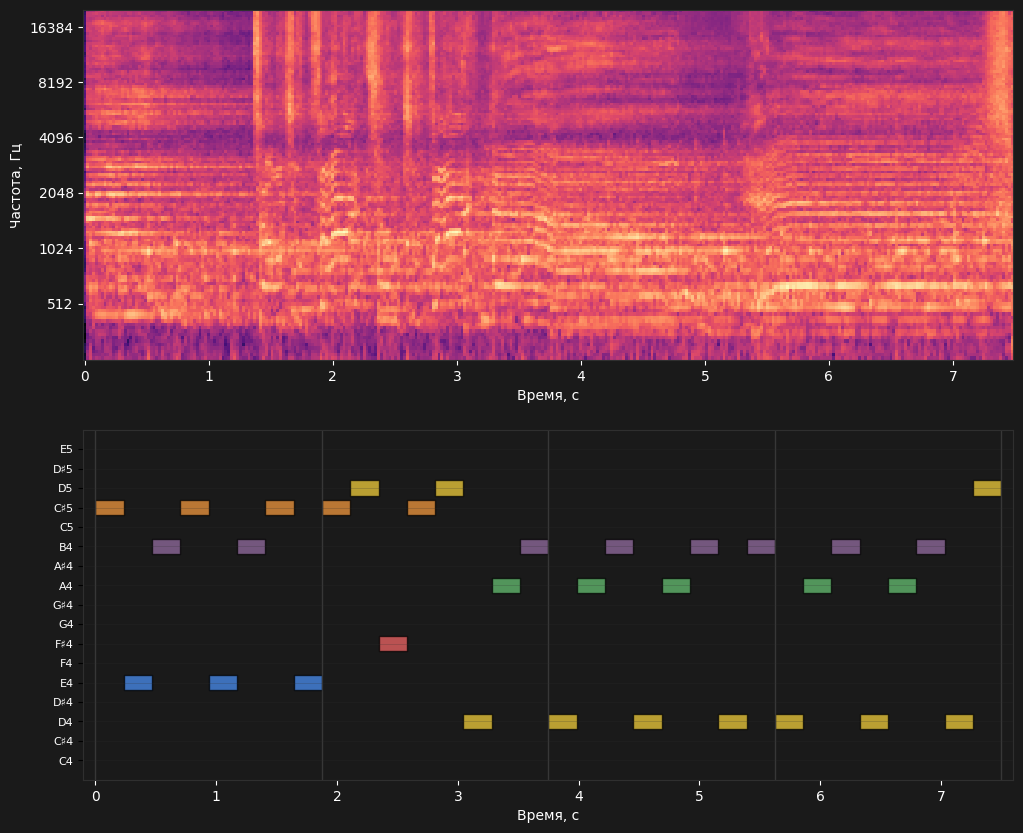

In [16]:
idx = 0
audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [17]:
train_loader = get_pause_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
spectrograms, classes = next(iter(train_loader))

In [18]:
spectrograms.shape

torch.Size([32, 1, 128, 256])

In [19]:
classes.shape

torch.Size([32, 64])

In [20]:
spectrograms[idx]

tensor([[[-2.1121, -0.4277, -0.3292,  ..., -0.9333, -0.5066,  0.4313],
         [-2.4862, -0.3344, -0.3980,  ..., -0.6229, -0.2643,  0.6010],
         [-2.1625, -0.3993, -0.5462,  ..., -0.2950,  0.0523,  0.8520],
         ...,
         [-1.5631,  0.1640,  0.1955,  ...,  1.1923,  0.9268,  0.9488],
         [-1.7045,  0.1685,  0.2850,  ...,  1.2100,  0.6400,  0.8262],
         [-1.9024, -0.2192, -0.0689,  ...,  1.1842,  0.5101,  0.3967]]])

In [21]:
classes[idx]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
model = PauseNet()
classes = model.forward(spectrograms)

In [20]:
classes.shape

torch.Size([32, 64])

In [21]:
classes

tensor([[-0.0386,  0.0178,  0.0008,  ..., -0.0038,  0.0036,  0.0408],
        [-0.0602,  0.0082,  0.0026,  ...,  0.0311,  0.0120,  0.0010],
        [-0.0240,  0.0329,  0.0196,  ..., -0.0192,  0.0539,  0.0105],
        ...,
        [-0.0739,  0.0326, -0.0005,  ...,  0.0015,  0.0061, -0.0238],
        [-0.0449,  0.0584, -0.0148,  ...,  0.0184,  0.0182,  0.0089],
        [-0.0325,  0.0445, -0.0035,  ..., -0.0223,  0.0243,  0.0062]],
       grad_fn=<AddmmBackward0>)